<a href="https://colab.research.google.com/github/ReemAhmed-as/DataAna2/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import nltk # Import the nltk module here
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
# Download the stopwords dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Load the dataset
df = pd.read_csv('Tweets.csv')


In [3]:
# Keep only necessary columns
df = df[['text', 'airline_sentiment']]

In [4]:
# Rename columns for simplicity
df.rename(columns={'airline_sentiment': 'sentiment'}, inplace=True)

In [5]:
# Data cleaning
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r"\b\d+\b", "", text)  # Remove numbers
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newlines
    text = re.sub('[’“”…]', '', text)  # Remove special characters
    return text

df['cleaned_text'] = df['text'].apply(clean_text)


In [6]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [7]:
!pip install nltk
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the 'wordnet' dataset
nltk.download('wordnet')

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
# Convert sentiment to numerical values
df['sentiment'] = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

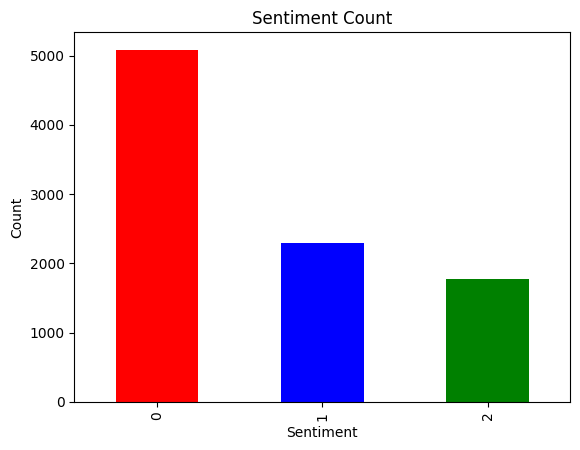

In [9]:
# Sentiment count plot
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Count', color=['red', 'blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

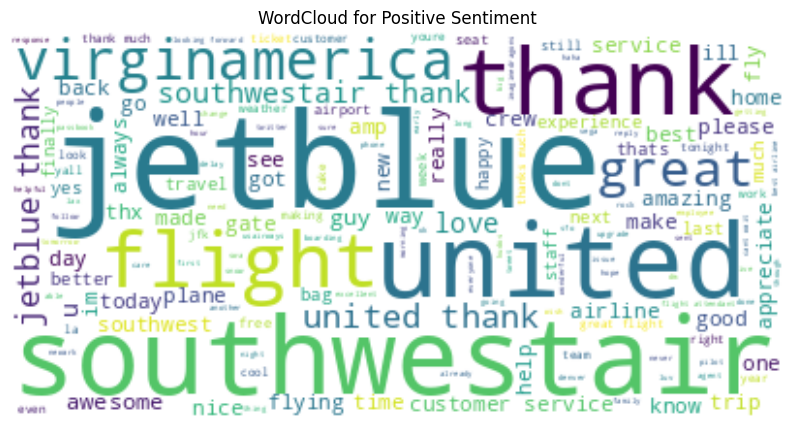

In [10]:
# WordCloud for positive sentiment
positive_text = " ".join(df[df['sentiment'] == 2]['cleaned_text'])
wordcloud = WordCloud(background_color='white').generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Sentiment')
plt.show()

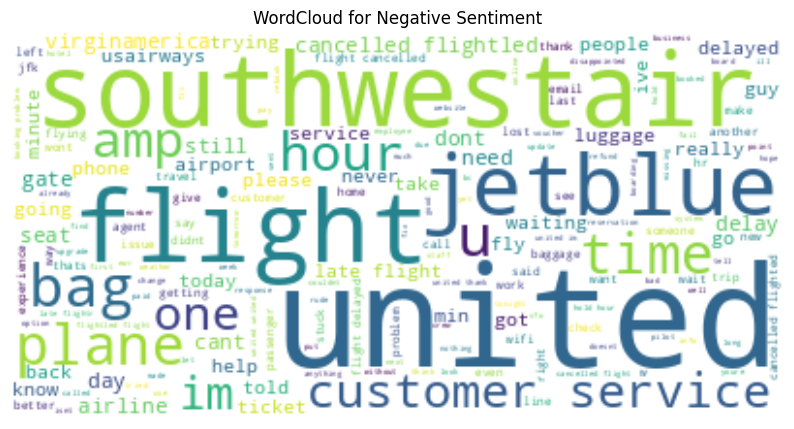

In [11]:
# WordCloud for negative sentiment
negative_text = " ".join(df[df['sentiment'] == 0]['cleaned_text'])
wordcloud = WordCloud(background_color='white').generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Sentiment')
plt.show()

In [12]:
# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the Multinomial Naive Bayes model
model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Make predictions
y_pred_mnb = model_mnb.predict(X_test)

In [16]:
# Evaluate the Multinomial Naive Bayes model
accuracy_mnb = metrics.accuracy_score(y_test, y_pred_mnb)
print(f'MultinomialNB Model Accuracy: {accuracy_mnb * 100:.2f}%')
print('Classification Report for MultinomialNB:')
print(metrics.classification_report(y_test, y_pred_mnb))


MultinomialNB Model Accuracy: 74.55%
Classification Report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1026
           1       0.68      0.45      0.54       455
           2       0.71      0.62      0.66       350

    accuracy                           0.75      1831
   macro avg       0.72      0.66      0.68      1831
weighted avg       0.74      0.75      0.73      1831



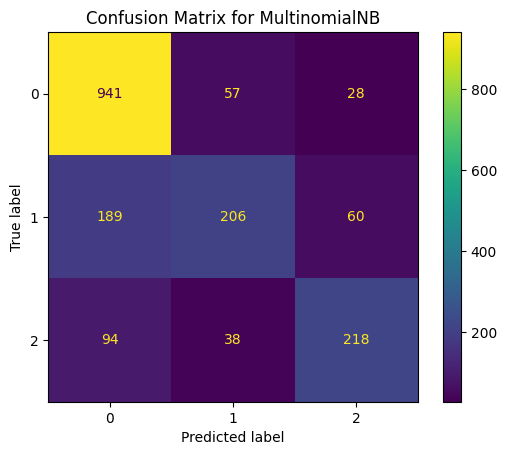

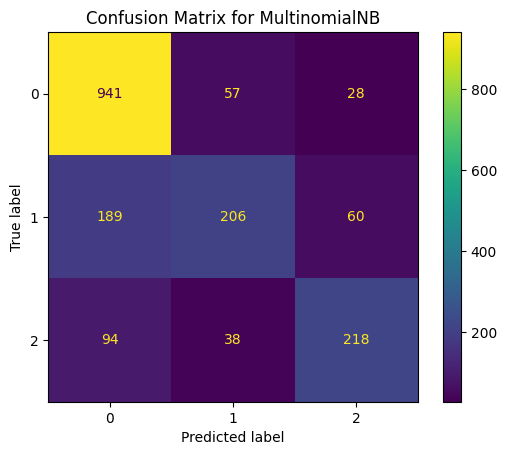

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(model_mnb, X_test, y_test)
disp.ax_.set_title('Confusion Matrix for MultinomialNB')

plt.show()
# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(model_mnb, X_test, y_test)
disp.ax_.set_title('Confusion Matrix for MultinomialNB')

plt.show()

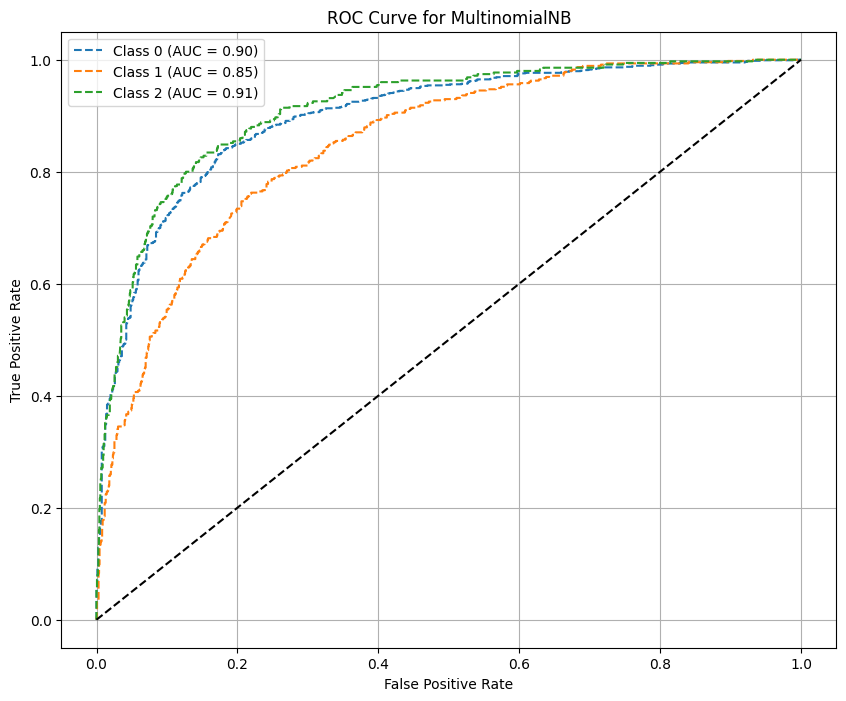

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming model_mnb and X_test, y_test are already defined
y_prob = model_mnb.predict_proba(X_test)

# Number of classes
n_classes = y_prob.shape[1]

# Initialize arrays for the ROC data
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])  # Binary case for each class

# Plotting the ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the chance line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MultinomialNB')
plt.legend()
plt.grid()
plt.show()